
 **Question 1:**  ​ ​Use the User dataset perform Random Forest and compare with Decision Tree. 

In [70]:
##Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [71]:
ud =pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/User_Data - Arindam Dev (1).csv')

In [72]:
ud.head(8)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1


In [73]:
ud.shape

(400, 5)

In [74]:
ud.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [75]:
ud1=ud.drop(['Gender'],axis=1)
ud1.head(5)

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [76]:
ud1.shape

(400, 4)

In [77]:
ud1.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [78]:
ud1.isna().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [79]:
##Importing all  sklearn Libraries for Training and testing data & checking for accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

In [80]:
# Assigning  the features into one variable and target data into another variable (Slicing )
x=ud1.iloc[:,:-1]
x.head(2)

,User ID,Age,EstimatedSalary
0,15624510,19,19000
1,15810944,35,20000


In [81]:
y=ud1.iloc[:,-1:]
y.head(3)

,Purchased
0,0
1,0
2,0


In [82]:
## Training and Testing data 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=5)

In [83]:
print('\n xtrain:',xtrain.shape)
print('\n xtest:',xtest.shape)
print('\n ytrain:',ytrain.shape)
print('\n ytest:',ytest.shape)


 xtrain: (320, 3)

 xtest: (80, 3)

 ytrain: (320, 1)

 ytest: (80, 1)


In [84]:
## Scaling down the features using Standard scaler
scaler=StandardScaler()
scaler.fit(xtrain)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [85]:
scaled_xtrain=scaler.fit_transform(xtrain)
scaled_xtest=scaler.fit_transform(xtest)

Fitting Decision Tree to Dataset

In [86]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2, random_state=15)
classifier.fit(scaled_xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [87]:
##predicting the test result 
ypred = classifier.predict(scaled_xtest)
ypred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [88]:
##Creating confusion matrix and Classifiaction report
matrix= confusion_matrix(ytest,ypred)
print(matrix)
print("\n Classification Report:")
print(classification_report(ytest,ypred))

[[46  7]
 [ 1 26]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        53
           1       0.79      0.96      0.87        27

    accuracy                           0.90        80
   macro avg       0.88      0.92      0.89        80
weighted avg       0.91      0.90      0.90        80



<function matplotlib.pyplot.show>

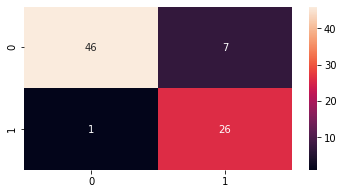

In [99]:
import seaborn as sns 
plt.figure(figsize=(6,3))
sns.heatmap(matrix, annot=True)
plt.show

<function matplotlib.pyplot.show>

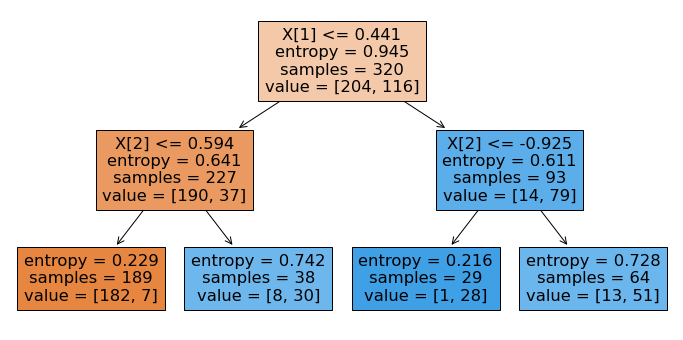

In [89]:
#plotting the decision tree 
plt.figure(figsize=(12,6))
tree.plot_tree(classifier,filled=True)
plt.show

In [90]:
text_representation=tree.export_text(classifier)
print(text_representation)

|--- feature_1 <= 0.44
|   |--- feature_2 <= 0.59
|   |   |--- class: 0
|   |--- feature_2 >  0.59
|   |   |--- class: 1
|--- feature_1 >  0.44
|   |--- feature_2 <= -0.92
|   |   |--- class: 1
|   |--- feature_2 >  -0.92
|   |   |--- class: 1



In [91]:
##checking the accuracy  By Decision tree
print('Accuracy:',accuracy_score(ytest,ypred)*100)

Accuracy: 90.0


**By Decision Tree We got Accuracy of 90%**

Fitting the Random forest to the dataset

In [92]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=50)
clf.fit(scaled_xtrain,ytrain)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
y_pred=clf.predict(scaled_xtest)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [94]:
## ##Creating confusion matrix and Classifiaction report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
cm=confusion_matrix(ytest,y_pred)
print(cm)
print('\n Classification Report:')
print(classification_report(ytest,y_pred))

[[49  4]
 [ 2 25]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        53
           1       0.86      0.93      0.89        27

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



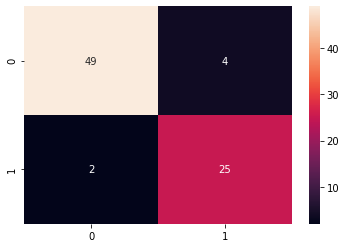

In [96]:
import seaborn as sns 
sns.heatmap(cm,annot=True)

In [95]:
## Checking the ACcuracy By Random Forest 
print('Accuracy:',accuracy_score(ytest,y_pred)*100)

Accuracy: 92.5


**BY Random Forest We got Accuracy of 92.5%**


*  Random Forest has higher accuracy than Decision Tree.
 
# Hence We conclude by saying this we use Random Forest  for this dataset.